In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def torus(n, c, a, R):
    theta = np.linspace(0, 2.*np.pi, n)
    phi = np.linspace(0, 2.*np.pi, n)
    theta, phi = np.meshgrid(theta, phi) + np.random.normal(size=(n,n))
    x = R*(c + a*np.cos(theta)) * np.cos(phi) + np.random.normal(size=(n,n))
    y = R*(c + a*np.cos(theta)) * np.sin(phi) + np.random.normal(size=(n, n))
    z = R* a * np.sin(theta) + np.random.normal(size=(n, n))

    return x, y, z

In [49]:
n = 100
x, y, z = torus(n, 2, 1, 20)
x_small, y_small, z_small =  torus(n, 2, 0.25, 20)

In [50]:
all_points_big = [np.array([x[i, j], y[i, j], z[i, j]]) for i in range(n) for j in range(n)]

In [51]:
all_points_small = [np.array([x_small[i, j], y_small[i, j], z_small[i, j]]) for i in range(n) for j in range(n)]

In [52]:
data = np.array(all_points_big + all_points_small)

In [53]:
target = [0] * len(all_points_big) + [1] * len(all_points_small)

In [62]:
def sample(data, cut, target):
    assert(cut > 0)
    return data.groupby(target, group_keys=False).apply(lambda x: x.sample(frac=1/cut))

In [90]:
def draw_solid_figure(data, cut):    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    data_n = sample(data, cut, "target")
    ax.scatter(data_n[0], data_n[1], data_n[2], c = data_n["target"])

# Normalisation

In [85]:
data_normalised = (data - np.mean(data)) / np.std(data) 

C:\Users\kanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [86]:
data = pd.DataFrame(data_normalised)

In [87]:
data["target"] = target

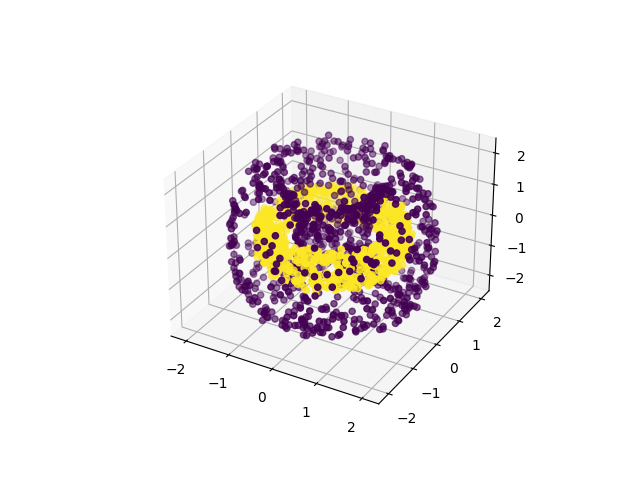

In [92]:
draw_solid_figure(data, 10)

In [89]:
pd.DataFrame(data).to_csv("data_new.csv", encoding="utf-8", index=False)